<center>
    <img src="https://raw.githubusercontent.com/TUIlmenauAMS/AudioCoding_Tutorials/main/images/ac_header.png">
</center>

### <a target="_blank" rel="noopener noreferrer" href="https://www.tu-ilmenau.de/mt-ams/personen/schuller-gerald/">Prof. Dr. -Ing. Gerald Schuller</a> <br> <a target="_blank" rel="noopener noreferrer" href="https://www.tu-ilmenau.de/mt-ams/lehre/msp-and-adsp-tutorials/">Jupyter Notebook: Renato Profeta</a>

[Applied Media Systems Group](https://www.tu-ilmenau.de/en/applied-media-systems-group/) <br>
[Technische Universität Ilmenau](https://www.tu-ilmenau.de/)

# Filter Banks I

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/Zk8Oum6LtUc?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

<center>
    <img src='https://raw.githubusercontent.com/TUIlmenauAMS/AudioCoding_Tutorials/main/images/ac_02_audioCoders.png' width='900'>
</center>

## Filter Banks
- essential element of most audio coders.
- transform from time to frequency domain and vice-versa.
<br>

    - Goal:
        - Good filter bank.
        - Compress audio signals.
    - Approach:
        - Redundancy Reduction.
        - Irrelevance Reduction.

## Filtering = Convolution

   - Remember, a digital (bandpass) filter can be represented by the **convolution** of the audio signal x(n) with the impulse response of the filter h(n), with non-zero coefficients between N=0,...L-1. The output y(n) is then obtained by the convolution formula:

$$\large
y(n)=x(n)*h(n)=\sum_{n'=0}^{L-1} x(n-n')\cdot h(n') $$

## Downsampled Convolution

 - We downsample the filtered (convolved) signal by N by keeping only every N'th sample. We replace n by mN in our convolution equation. n' is the convolution sum index at the higher sampling rate,

 $$\large
 y^{\downarrow N}(m)=y(mN)=\sum_{n'=0}^{L-1} x(mN-n')\cdot h(n')
 $$

 - To symplify our notation, we always define *m* as the index at the lower sampling rate:

 $$\large
 y(m) := y^{\downarrow N}(m) $$

## Upsampling Followed by Convolution

  - For the synthesis filter bank we first have upsampling, followed by bandbass filtering/ convolution.
  - The upsampled version contains the samples of the downsampled version at every N'th sample (and zeros in between), $y^{\uparrow N}(mN)=y(m)$.
  - The convolution of the upsampled version is then:
  $$\large
  \hat{y}(n):= \sum_{n'=0}^{L-1} y^{\uparrow N}(n-n')\cdot g_k(n') $$
  - The upsampled version of y is only non-zero for when its argument is multiples of N, n-n'=m'N , hence n'=n-M'N, m' is the convolution sum index at the lower sampling rate:
  $$\large
  \hat{y}(n):=\sum_{m'} y^{\uparrow N} (m' N) \cdot g_k(n-m'N)$$
  - For the summation limits for *m* we need to observe that $g_k$ is only non-zero for the argument in the range of 0,…,L-1, hence:
  $$\large
  0 \leq n-m' \leq L-1 \\
  \large
  0 \geq -n+m'N \geq -L+1, \quad n \geq m'N \geq n-L+1, \quad \frac{n}{N} \geq m' \geq \frac{(n-L+1)}{N} $$
  - With $\lfloor  . \rfloor$ the floor operator (rounding down), and $\lceil . \rceil$ the ceiling operator (rounding up):
  $$\large
  \left\lfloor \frac{n}{N} \right\rfloor \geq m' \geq \left\lceil \frac{(n-L+1)}{N} \right\rceil$$
  and with $y^{\uparrow N}(m'N)=y(m)$ we get:
  
  $$\large
  \hat{y}(n):=\sum_{m'=\left\lceil\frac{(n-L+1}{N}\right\rceil}^{\left\lceil\frac{n}{N}\right\rceil}
  y(m') \cdot g_k(n-m'N)$$

## Critically sampled Analysis and Synthesis Filter Bank, Direct Implementation

<center>
    <img src='https://raw.githubusercontent.com/TUIlmenauAMS/AudioCoding_Tutorials/main/images/ac_03_critc1.png' width='900'>
</center>

<center>
    <img src='https://raw.githubusercontent.com/TUIlmenauAMS/AudioCoding_Tutorials/main/images/ac_04_critc2.png' width='900'>
</center>

## Down-Sampling

- The operation of "down-sampling" by factor N describes the process of keeping every Nth sample discarding the rest:

<center>
    <img src='https://raw.githubusercontent.com/TUIlmenauAMS/AudioCoding_Tutorials/main/images/ac_05_downsamplint.png' width='900'>
</center>

## Up-Sampling

 - The operation of "up-sampling" by factor N describes the insertion of N-1 zeros between every sample of the input:

<center>
    <img src='https://raw.githubusercontent.com/TUIlmenauAMS/AudioCoding_Tutorials/main/images/ac_06_upsampling.png' width='900'>
</center>

## Filter Bank Structure - The Analysis Filter Bank Direct Implementation

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/To2nyZJfbmw?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

<center>
    <img src='https://raw.githubusercontent.com/TUIlmenauAMS/AudioCoding_Tutorials/main/images/ac_07_analysis.png' width='300'>
</center>

**Example:**

 - N=1024 filters (power of 2 for efficient FFT impl.)
 - $f_s$=44100Hz sampling frequency
 - $f_g$=22050Hz Nyquist frequency
$$\large
\frac{f_g}{N}=\frac{\frac{f_s}{2}}{N}=21.5 Hz $$
 - If we have N filters, and no down-samplers, then we would have N*fs samples per second after filtering – more than input!
     - hence down-samplers.
     - with down-samplers: number of samples stays constant, **downsampling factor = number of subbands**.
     - This means "critical sampling".

## Filter Bank Structure - The Synthesis Filter Bank, Direct Implementation

<center>
    <img src='https://raw.githubusercontent.com/TUIlmenauAMS/AudioCoding_Tutorials/main/images/ac_08_synthesis.png' width='400'>
</center>

 - Up-sample each subband by N to restore original sampling rate.
 - Apply passband filter to each subband signal.
 - Add each subband signal to generate output signal.

## Filter Bank Structure - Direct Implementation: Python Example

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/TW8-RRnLIQs?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Implement 1 branch, subband k=1, of the analysis and synthesis filter bank with N=8 subbands with 32kHz sampling rate (hence the passband is between 2 kHz and 4 kHz), in **direct implementation.**

Start with designing a bandpass filter using the scipy.signal.remez function, which is an "equi-ripple" FIR filter design function:

In [1]:
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt

<ipython-input-2-20dc077a69b5>:2: DeprecationWarning: You are passing weight=[100, 1, 100] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  b=signal.remez(8*N,[0,500,1000,2000,2500,16000],[0,1,0],


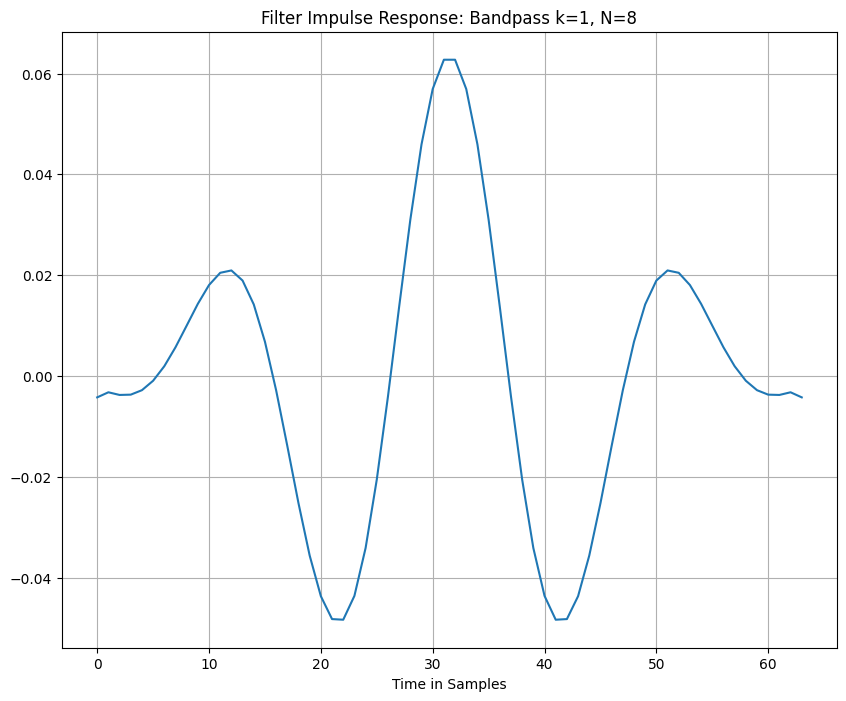

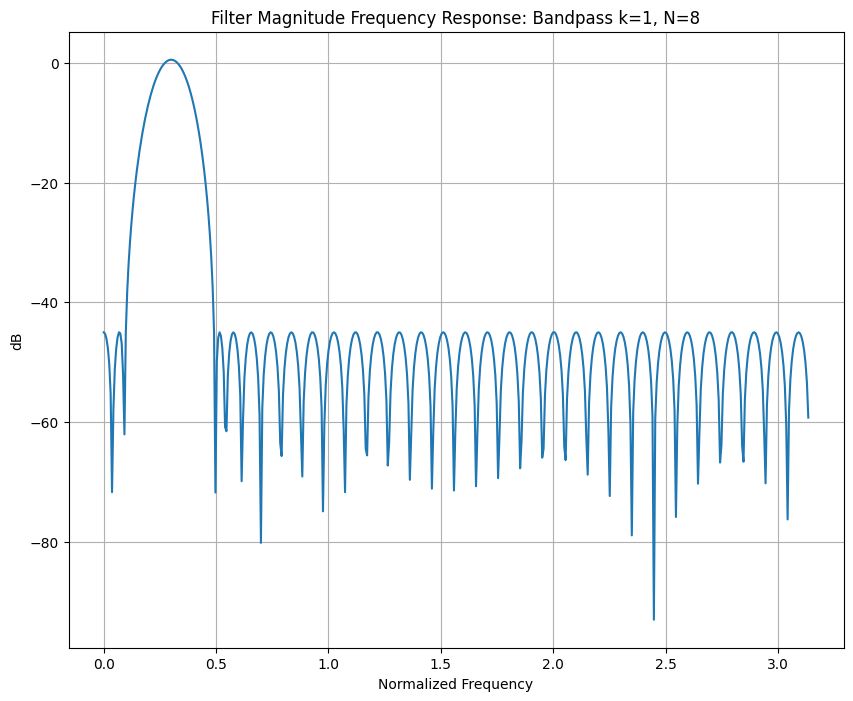

In [2]:
N=8
b=signal.remez(8*N,[0,500,1000,2000,2500,16000],[0,1,0],
[100,1,100],Hz=32000, type='bandpass')
#Check the design:
plt.figure(figsize=(10,8))
plt.plot(b)
plt.title('Filter Impulse Response: Bandpass k=1, N=8')
plt.xlabel('Time in Samples')
plt.grid()

w,H=signal.freqz(b)
plt.figure(figsize=(10,8))
plt.plot(w,20*np.log10(abs(H)+1e-6))
plt.title('Filter Magnitude Frequency Response: Bandpass k=1, N=8')
plt.xlabel('Normalized Frequency')
plt.ylabel('dB')
plt.grid()

Now the analysis filtering and down sampling:

In [3]:
import librosa
import IPython.display as ipd
import scipy.signal as signal

In [7]:
!git clone https://github.com/TUIlmenauAMS/AudioCoding_Tutorials.git
sr=32000
x, sr = librosa.load('/content/AudioCoding_Tutorials/audio/fantasy-orchestra.wav', sr=sr)
ipd.Audio(x,rate=sr)

Cloning into 'AudioCoding_Tutorials'...
remote: Enumerating objects: 276, done.
remote: Counting objects: 100% (156/156), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 276 (delta 62), reused 78 (delta 26), pack-reused 120 (from 1)
Receiving objects: 100% (276/276), 18.00 MiB | 30.83 MiB/s, done.
Resolving deltas: 100% (64/64), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
print("length of sound in samples: ", len(x))

length of sound in samples:  378030


length of filtered sound in samples:  378030


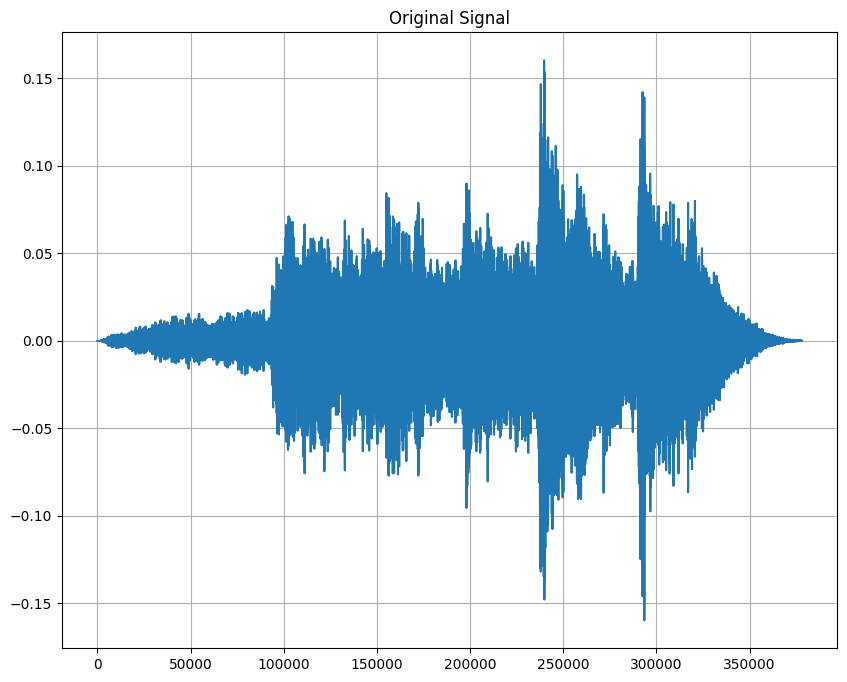

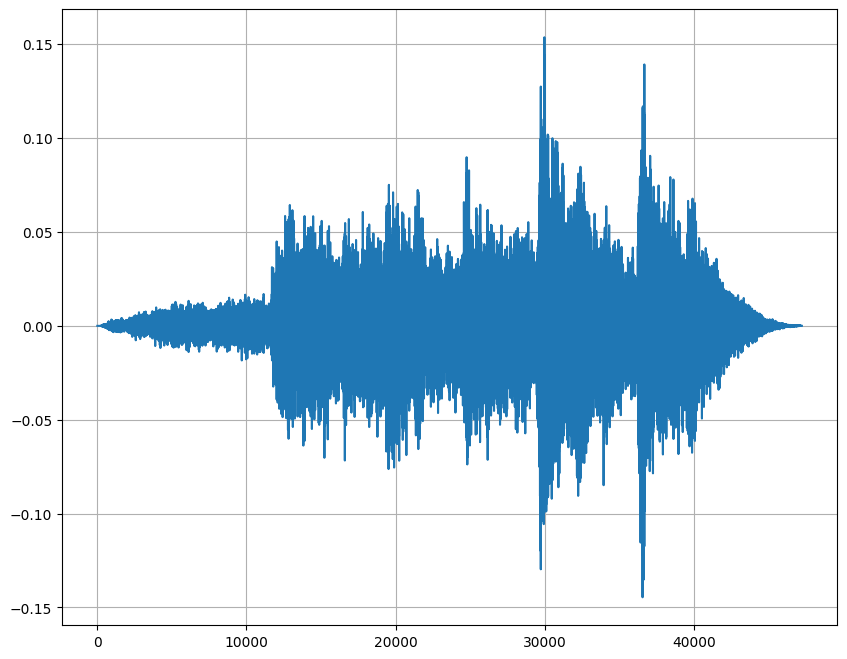

In [9]:
plt.figure(figsize=(10,8))
plt.title('Original Signal')
#Filter implementation:
filtered=signal.lfilter(b,1,x)
print("length of filtered sound in samples: ", len(filtered))
plt.plot(filtered)
plt.grid()
#play filtered sound:
display(ipd.Audio(filtered*30,rate=32000))
#Now Down-sampling with factor N:
N=8
filteredds=filtered[::N]
plt.figure(figsize=(10,8))
plt.plot(filteredds)
plt.grid()
display(ipd.Audio(filteredds*30,rate=4000))

Now the up-sampling and synthesis filtering:

In [ ]:
#Up-sampling:
filteredus=np.zeros(len(filteredds)*N)
filteredus[::N]=filteredds
#Listen to the up-sampled sound:
display(ipd.Audio(filteredus,rate=32000))
#Synthesis Filtering:
#Bandpass Synthesis Filter implementation to attenuate the spectral copies:
filteredsyn=signal.lfilter(b,1,filteredus)
plt.figure(figsize=(10,8))
plt.plot(filteredsyn)
plt.title('Up-sampled and Filtered Signal')
plt.xlabel('Time in Samples')
plt.ylabel('Sample Values')
plt.grid()
display(ipd.Audio(filteredsyn,rate=32000))

**Observe:** After the synthesis fltering the signal again sounds like after the analysis fltering, even though we had downsampling and up-sampling in between. This means we did not loose much information after down-sampling!

## Definition: Perfect Reconstruction

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/De6Q7ArcrWA?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

 - The property of the output signal out of cascaded analysis and synthesis filter bank being identical to the input signal (except for a time shift $n_d$ ) is called **"Perfect Reconstruction"** (PR):
 $$ \text{output}=x(n-n_d)$$ <br>
 - A filter bank having this property is called a "Perfect Reconstruction Filter Bank".

## Filter Bank Structure – Perfect Reconstruction

### Example PR filter bank: DFT

<center>
    <img src='https://raw.githubusercontent.com/TUIlmenauAMS/AudioCoding_Tutorials/main/images/ac_09_fb.png' width='400'>
</center>

 - Thought experiment: ideal `brick wall filters`.
 - Brick wall: magnitude in passband is one, otherwise zero.
 - Nyquist Theorem: we can down-sample the subband signals by factor N without loss of information.
 - With suitable brick wall synthesis filters, perfect reconstruction (input = output) could be achieved.


### Bandpass Nyquist

Goal:

 - Keep critical downsampling (downsampling rate N is equal to number of subbands).
 - No increase in number of samples.
 - Still want to obtain perfect reconstruction!
 - Ideally aliasing cancels!

#### Example Bandpass Signal

<center>
    <img src='https://raw.githubusercontent.com/TUIlmenauAMS/AudioCoding_Tutorials/main/images/ac_10_bandpass_ny.png' width='400'>
</center>

### After Downsampling and Upsampling

**Bandpass Nyquist:**

Sampling at least twice the bandwidth f_b enables the reconstruction of the bandwidth limited signal (if the lower end of the freq. band is multiple integers of the bandwidth).

<center>
    <img src='https://raw.githubusercontent.com/TUIlmenauAMS/AudioCoding_Tutorials/main/images/ac_11_bandpass_ny2.png' width='600'>
</center>

**Reconstruction:** apply ideal bandpass filter for original frequency range ("fish out" original), no overlap with aliasing.

**Problem:** ideal bandpass filters are not realizable!

## Ideal Filters

 - Ideal filters are not realizable.
 - In the time domain they would mean a convolution of our signal with a Sinc function.
 - Sinc function is infinitely long and not causal, meaning it causes infinite delay.
 - We can not simply use a DFT or FFT to obtain an ideal filter in the frequency domain either.
 - Because the DFT also represents a filter bank, but a special type.
 - Its equivalent filters are far from perfect filters (hence we cannot make ideal filters with it), not good enough for our purposes (audio coding and the ear), as we will see.
 - Don‘t use your eye (looking at waveforms) to guess what the ear might be hearing (quite different processing).

## Basic Principle: z-Transformation (1)

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/FfZrIimlciA?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

 - **Goal:** Realizable FB with critical sampling and perfect reconstruction (PR).
 - **Problems** with ideal flter banks:
   - Brick wall filters not realizable (infinite delay!)
 - **Approach:**
   - Find a suitable mathematical description for realizable Perfect Reconstruction Filter Banks.

### Analysis Side

Use **Noble Identities** to Exchange Filtering and Downsampling of Each Subband.

Take one subband:

<center>
    <img src='https://raw.githubusercontent.com/TUIlmenauAMS/AudioCoding_Tutorials/main/images/ac_12_noble.png' width='600'>
     <img src='https://raw.githubusercontent.com/TUIlmenauAMS/AudioCoding_Tutorials/main/images/ac_13_noble2.png' width='600'>
</center>

*See also:* https://github.com/GuitarsAI/ADSP_Tutorials/blob/master/ADSP_08_Nobel%20Identities.ipynb

In [ ]:
%%html
<iframe width="900" height="400" src="https://nbviewer.jupyter.org/github/GuitarsAI/ADSP_Tutorials/blob/master/ADSP_08_Nobel%20Identities.ipynb"></iframe>

#### Noble Identities, Polyphase Vectors

The left hand side with the downsamplers can be seen as a serial to parallel converter into blocks of length N. We obtain blocks or vectors of length N for the signal x and the filter H, each containing the "polyphase" components.

The z-Transform vector of the polyphase components of input x:

$$\large
X(z)=[X_0(z), \dots, X_{N-1}(z)]$$

The z-Transform vector of the polyphase components of the filter:

$$\large
H_k(z) = [H_{N-1,k}(z), \dots, H_{0,k}(z)]$$
with

$$\large
X_n(z)=\sum_{m=0}^\infty x(mN+n) \cdot z^{-m} \quad H_{n,k}(z)=\sum_{m=0}^\infty h_k(mN+n) \cdot z^{-m} \\
n=0,\dots,N-1 $$

This shows a representation as vector of polynomials. Observe that a polyphase vector like:

$$\large
X(z)=[X_0(z), \dots, X_{N-1}(z)]$$

can alternatively also be written as a polynomial of vectors,

$$\large
X(z) = \sum_{m=0}^\infty [x(mN), x(mN+1), \dots x(nM+N-1)] \cdot z^{-m} $$

We see that the vectors in the sum are the blocks of length N of our audio signal. The sum takes all blocks of length N of our audio signal and turns them into this polyphase polynomial.

The filtering and downsampling then becomes:

$$\large
X(z) \cdot H_k^T(z) = Y_k(z) $$

Since we have not just 1 filter, but N filters, we can collect the N filter polyphase vectors of size N into a "polyphase matrix" of size NxN!. This then produces a polyphase vector of size N for the N resulting filter output or subbands:

$$\large
Y(z)=[Y_0(z), \cdot, Y_{N-1}(z)]$$

#### Polyphase Description

Arrange the N impulse response vectors Hk(z) of length N into a NxN square matrix (can be invertible!):

<center>
    <img src='https://raw.githubusercontent.com/TUIlmenauAMS/AudioCoding_Tutorials/main/images/ac_14_poly1.png' width='600'>
</center>

##### Polyphase Description, Analysis

 - Hence the form of the polyphase matrix for analysis is (Type 1 polyphase):
 <center>
    <img src='https://raw.githubusercontent.com/TUIlmenauAMS/AudioCoding_Tutorials/main/images/ac_15_poly2.png' width='600'>
</center>
<br>
 - and each subband filter can hence be written as:
  <center>
    <img src='https://raw.githubusercontent.com/TUIlmenauAMS/AudioCoding_Tutorials/main/images/ac_16_poly3.png' width='400'>
</center>

Final equation of analysis filter bank: $\large Y(z) = X(z) \cdot H(z)$

 - H(z): Analysis Polyphase Matrix, NxN
 - X(z): Vector of polynomials, contains input samples.

Mathematically very simple operation for entire filter bank <ins>including</ins> down sampling.

  <center>
    <img src='https://raw.githubusercontent.com/TUIlmenauAMS/AudioCoding_Tutorials/main/images/ac_17_polyA1.png' width='400'>
</center>

**Observe** that a multiplication with $z^{-1}$ can be interpreted as a delay of the signal by 1 sample. It can be implemented as a delay or memory element.

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/kZxBuvAZvps?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

**Example**:
Assume a signal x=[5,6,7,8,9,10] and N=3. Then we get the signal blocks x(m) with m in a range as we needed to fit the signal, as:
 - x(0)=[5,6,7]
 - x(1)=[8,9,10]

The polyphase elements $x_n(z)$ with phase n=0...,N-1 are:

$$\large
X_0(z) = 5 + 8 \cdot z^{-1} \quad X_1(z) = 6 + 9 \cdot z^{-1} \quad X_2(z) = 7 + 10 \cdot z^{-1}$$

Or written as polynomial of blocks,

$$\large
X(z) = \sum_{m=0}^1 [5,6,7] \cdot z^0 + [8,9,10] \cdot z^{-1}$$

The polyphase vector is $\large X(z)=[X_0(z),X_1(z),X_2(z)]=[5 + 8 \cdot z^{-1}, 6 + 9 \cdot z^{-1},  7 + 10 \cdot z^{-1}]$

Assume we have the first analysis impulse response of $h_0$ =[3,4,5,6,7,8] for N=3.

Then its polyphase vector is in general:

$$\large
H_k(z) := [H_{N-1,k}(z), H_{N-2,k}(z), \dots, H_{0,k}(z)]$$

(with our phases going down) and for this example:
$$\large
H_0(z)=[5 + 8 \cdot z^{-1},4 + 7 \cdot z^{-1}, 3 + 6 \cdot z^{-1}]$$

### Synthesis Side

Use **Noble Identities** to Exchange Filtering and Upsampling of Each Subband.

Take one subband:

<center>
    <img src='https://raw.githubusercontent.com/TUIlmenauAMS/AudioCoding_Tutorials/main/images/ac_18_polyS1.png' width='700'>
     <img src='https://raw.githubusercontent.com/TUIlmenauAMS/AudioCoding_Tutorials/main/images/ac_19_polyS2.png' width='600'>
</center>


##### Polyphase Description, Synthesis

 - The polyphase matrix for synthesis is (Type 2 polyphase):
  <center>
    <img src='https://raw.githubusercontent.com/TUIlmenauAMS/AudioCoding_Tutorials/main/images/ac_20_synth.png' width='600'>
</center>
<br>
 - Now each filter has its polyphase components along the rows, and each subband filter can be written as:
   <center>
    <img src='https://raw.githubusercontent.com/TUIlmenauAMS/AudioCoding_Tutorials/main/images/ac_21_synth2.png' width='400'>
</center>
<br>
 - Output of synthesis Filter Bank:
   <center>
    <img src='https://raw.githubusercontent.com/TUIlmenauAMS/AudioCoding_Tutorials/main/images/ac_22_synth3.png' width='600'>
</center>
<br>

Perfect recosntruction (PR) results if:

$$\large
G(z) = z^{-d} \cdot H(z) (z^{-d} = Delay)$$

Since by substitution we get:
$$\large
\hat{X}(z)=X(z)\cdot H(z) \cdot z^{-d} \cdot H^{-1}(z) \\
\large
\rightarrow \hat{X}(z)=z^{-d} \cdot X(z) $$

*Observe:* PR requires 'only' a matrix inversion.

**Problem: How to invert a matrix of polynomials?**

### Example: Construction of H(z)

 - How to obtain a H(z), which only has the first coefficient of our polynomial unequal to zero?

 $\large \rightarrow$ design $h_k(n)$ such that $H_k(z)$ has no higher powers of z:

<img src='https://raw.githubusercontent.com/TUIlmenauAMS/AudioCoding_Tutorials/main/images/ac_23_exH.png' width='400'>
<br>
Hence only the first block of our impulse response can be unequal to 0, and it is limited to a length of N! (too short!)

### Examples: The DFT as a filter bank

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/5YIPZvZTtpQ?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

The Discrete Fourier Transform can be written as:

$$\large
Y_k(m)=\sum_{n=0}^{N-1} x(mN-N+1+n) \cdot e^{-j \frac{2\pi}{N}kn}$$
with the block index m=1...L

The substitution n'=N-1-n yields:

$$\large
Y_k(m)=\sum_{n=0}^{N-1} x(mN-n') \cdot e^{-j \frac{2\pi}{N}k(N-1-n')}$$

This is a critically sampled filter bank with the impulse response (design trick: $h_k(n)$ is only as long as one block).
<img src='https://raw.githubusercontent.com/TUIlmenauAMS/AudioCoding_Tutorials/main/images/ac_24_dft.png' width='600'>
<br>

**Convolution (blockwise)**
$$\large
y_k(m)=\sum_{n=0}^{N-1} x(mN-n) \cdot h_k(n)$$

The analysis polyphase matrix of the DFT is identical to the DFT transform matrix:

$$H(z)=F=DFT-Matrix$$

$\large \rightarrow$ Perfect reconstruction, but filters not good enough!

The Fourier Matrix is defined as:

$$\large
F_{n,k}=W^{nk}$$

<img src='https://raw.githubusercontent.com/TUIlmenauAMS/AudioCoding_Tutorials/main/images/ac_25_dftMatrix.png' width='700'>
<br>

with $\large W=e^{-j2 \frac{\pi}{N}}$

### Example: The $DCT_{IV}$

Using the same substitution as with the DFT, the Discrete Cosine Transform type 4 can be written as:

$$\large
Y_k(m)=\sum_{n=0}^{N-1}x(mN-n) \cdot \cos \left( \frac{\pi}{N} \left(k+\frac{1}{2}\right) \left((N-1-n)+\frac{1}{2}\right)\right) \quad n.k=0 \dots N-1$$

with impulse response (N: block length):

$$\large
h_k(n)= \cos \left( \frac{\pi}{N} \left( k+\frac{1}{2} \right) \left( (N-1-n) + \frac{1}{2} \right) \right) \quad n.k=0 \dots N-1$$

Special property: filter bank is orthogonal:

$$\large
\frac{2}{N} H^T(z^{-1})=z^{-d} \cdot H^{-1}(z) $$

for Perfect Reconstruction, hence the synthesis is the transposed time reversed matrix.

#### DCT Type 4, with 8 Subbands (N=8)

<img src='https://raw.githubusercontent.com/TUIlmenauAMS/AudioCoding_Tutorials/main/images/ac_26_dct4.png' width='800'>
<img src='https://raw.githubusercontent.com/TUIlmenauAMS/AudioCoding_Tutorials/main/images/ac_27_dct4_1.png' width='800'>
<br>

**Problem**

 - Except for the zeros, the stopband attenuation is not very high (still PR!)
 - Problem especially for audio, since the zeros are not sufficient for good selectivity.
 - Approach: design filter banks with longer filters, with better ability for higher stopband attenuation.
 - $\rightarrow$ Really use z-domain for longer filters.

### Python Examples

*Real-time python audio examples: you need a microphone and speakers connected.* <br>
*THESE EXAMPLES WILL NOT WORK ON REMOTE ENVIRONMENTS SUCH AS GOOGLE COLAB AND BINDER:*

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/VpHtVs3aovU?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

#### FFT Example

Real-time FFT of blocks of 1024 audio samples. Horizontally you seen the FFT bins or subbands, vertically the magnitude of the FFT coefficients/samples in dB.

**Observe:** The FFT subbands are symmetric around the center, the highest frequency (Nyquist frequency) is in the center. If you whistle, you see 2 peaks at the corresponding FFT subbands.

In [ ]:
# Imports and Configuration
%matplotlib qt
import pyaudio
import numpy as np
import scipy.signal as signal
import struct
import matplotlib.pyplot as plt
from matplotlib.mlab import window_hanning,specgram
from matplotlib.colors import LogNorm
from matplotlib.ticker import FuncFormatter, MultipleLocator
from ipywidgets import ToggleButton, Checkbox, Button
from ipywidgets import HBox, interact
import threading

In [ ]:
CHUNK_SIZE = 2048 #Blocksize
CHANNELS = 1 # Audio Channes
RATE = 32000  #Sampling Rate in Hz
N=8.0     #Downsampling/Upsampling Rate
FORMAT = pyaudio.paInt16 #conversion format for PyAudio stream
NFFT = 1024 #NFFT value for spectrogram
OVERLAP = 512 #overlap value for spectrogram

In [ ]:
# Function to Plot Spetrogram
ctr=0 # Control for plotting
def run_fft(toggle_run):
    global ctr
    while(True):
        if toggle_run.value==True:
            break

        #Reading from audio input stream into data with block length "CHUNK":
        data_stream = stream.read(CHUNK_SIZE)
        shorts = (struct.unpack( 'h' * CHUNK_SIZE, data_stream ));
        samples=np.array(list(shorts),dtype=float);



        #play out samples:
        samples=np.clip(samples, -32000,32000)
        samples=samples.astype(int)
        #converting from short integers to a stream of bytes in "data":
        data=struct.pack('h' * len(samples), *samples);
        #Writing data back to audio output stream:
        stream.write(data, CHUNK_SIZE)

        # Update Plot
        if (ctr%4 ==0):
            line.set_ydata(20.0*np.log((np.abs(np.fft.fft(samples[0:fftlen])/np.sqrt(fftlen))+1))/np.log(10.0))
            fig.canvas.draw()
        ctr+=1

In [ ]:
# GUI
toggle_run = ToggleButton(description='Stop')
button_start= Button(description='Start')
box_sampling = Checkbox(False, description='Downsampling/Upsampling')
box_LPFilter = Checkbox(False, description='LP Filters')

def start_button(button_start):
    thread.start()
    button_start.disabled=True
button_start.on_click(start_button)


def on_click_toggle_run(change):
    if change['new']==False:
        toggle_run.value==True
        stream.stop_stream()
        stream.close()
        p.terminate()
        plt.close()
toggle_run.observe(on_click_toggle_run, 'value')



box_buttons = HBox([button_start,toggle_run])


In [ ]:
# Create a Thread for run_spectrogram function
thread = threading.Thread(target=run_fft, args=(toggle_run,))

In [ ]:
# Start Audio Stream
# Create
p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                output=True,
                frames_per_buffer=CHUNK_SIZE)



input_data = stream.read(CHUNK_SIZE)
samples = np.frombuffer(input_data,np.int16)

In [ ]:
# Initialize Plot and Display GUI

display(box_buttons)

fftlen=int(CHUNK_SIZE/2);

[fig, ax] = plt.subplots()
plt.ylabel('dB')
plt.xlabel('FFT bins/Subbands')
plt.title('Live FFT Magnitude Spectrum of Microphone Signal')

x = np.arange(0, fftlen)        # x-array
#Set scale on y-axis and generate line object with it:
[line, ]= ax.plot(x, 100.0**np.sin(x))

def handle_close(evt):
    # When everything done, release the capture
    stream.stop_stream()
    stream.close()
    p.terminate()

plt.connect('close_event', handle_close);

#### Spectrogram Example

A time-frequency representation, a spectrogram, which shows the magnitude of the FFT coefficients as different colors.

**Observe:** This shows the time-frequency nature of filter banks (of which the FFT is a special example). You have both, time and frequency dependencies.

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/6WJQ3KCBN7w" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [ ]:
# Imports and Configuration

import pyaudio
import numpy as np
import scipy.signal as signal
import struct
import matplotlib.pyplot as plt
from matplotlib.mlab import window_hanning,specgram
from matplotlib.colors import LogNorm
from matplotlib.ticker import FuncFormatter, MultipleLocator
from ipywidgets import ToggleButton, Checkbox, Button
from ipywidgets import HBox, interact
import threading

In [ ]:
CHUNK_SIZE = 2048 #Blocksize
CHANNELS = 1 # Audio Channes
RATE = 32000  #Sampling Rate in Hz
N=8.0     #Downsampling/Upsampling Rate
FORMAT = pyaudio.paInt16 #conversion format for PyAudio stream
NFFT = 1024 #NFFT value for spectrogram
OVERLAP = 512 #overlap value for spectrogram

In [ ]:
# LP Filter
[b,a]=signal.iirfilter(8, 1900.0/16000,rp=60,btype='lowpass')
#Memory for the filter:
zd=np.zeros(8)
zu=np.zeros(8)
LPFilterOn=False

In [ ]:
# Function to Plot Spetrogram
SamplingOn=False # Turn Donwsampling/Upsampling On/Off
ctr=0 # Control for plotting
def run_spectrogram(toggle_run):
    global zd, zu, ctr, SamplingOn, LPFilterOn
    while(True):
        if toggle_run.value==True:
            break

        #Reading from audio input stream into data with block length "CHUNK":
        data_stream = stream.read(CHUNK_SIZE)
        shorts = (struct.unpack( 'h' * CHUNK_SIZE, data_stream ));
        samples=np.array(list(shorts),dtype=float);

        #start block-wise signal processing:
        #Low pass filter *before downsampling*:
        if LPFilterOn==True:
            [samples,zd]=signal.lfilter(b, a, samples, zi=zd)

        #Compute a block/an array of a unit pulse train corresponding a downsampling rate of N:
        #make unit pulse train with modulus function "%":
        s=(np.arange(0,CHUNK_SIZE)%N)==0
        #The sampling:
        #multiply the signal with the unit pulse train:
        if SamplingOn == True:
            samples=samples*s;


        #Lowpass filtering *after upsampling*:
        #filter function:
        if LPFilterOn==True:
            [samples,zu]=signal.lfilter(b, a, samples, zi=zu)

        #end signal processing

        #play out samples:
        samples=np.clip(samples, -32000,32000)
        samples=samples.astype(int)
        #converting from short integers to a stream of bytes in "data":
        data=struct.pack('h' * len(samples), *samples);
        #Writing data back to audio output stream:
        stream.write(data, CHUNK_SIZE)

        # Update Plot
        if (ctr%4 ==0):
            arr2D,freqs,bins = specgram(samples,window=window_hanning,
                                        Fs = RATE,NFFT=NFFT,noverlap=OVERLAP)
            im_data = im.get_array()
            if ctr < 16:
                im_data = np.hstack((im_data,arr2D))
                im.set_array(im_data)
            else:
                keep_block = arr2D.shape[1]*(16 - 1)
                im_data = np.delete(im_data,np.s_[:-keep_block],1)
                im_data = np.hstack((im_data,arr2D))
                im.set_array(im_data)
            fig.canvas.draw()
        ctr+=1

In [ ]:
# GUI
toggle_run = ToggleButton(description='Stop')
button_start= Button(description='Start')
box_sampling = Checkbox(False, description='Downsampling/Upsampling')
box_LPFilter = Checkbox(False, description='LP Filters')

def start_button(button_start):
    thread.start()
    button_start.disabled=True
button_start.on_click(start_button)


def on_click_toggle_run(change):
    if change['new']==False:
        stream.stop_stream()
        stream.close()
        p.terminate()
        plt.close()
toggle_run.observe(on_click_toggle_run, 'value')

def box_samping_changed(box_sampling):
    global SamplingOn
    if box_sampling['new']:
        SamplingOn=True
    else:
        SamplingOn=False
box_sampling.observe(box_samping_changed, names='value')

def box_LPFilter_changed(box_LPFilter):
    global LPFilterOn
    if box_LPFilter['new']:
        LPFilterOn=True
    else:
        LPFilterOn=False
box_LPFilter.observe(box_LPFilter_changed, names='value')

box_buttons = HBox([button_start,toggle_run])
box_checkbox = HBox([box_sampling,box_LPFilter])

In [ ]:
# Create a Thread for run_spectrogram function
thread = threading.Thread(target=run_spectrogram, args=(toggle_run,))

In [ ]:
# Start Audio Stream
# Create
p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                output=True,
                frames_per_buffer=CHUNK_SIZE)



input_data = stream.read(CHUNK_SIZE)
samples = np.frombuffer(input_data,np.int16)

In [ ]:
# Initialize Plot and Display GUI

display(box_buttons)
display(box_checkbox)

fig, ax = plt.subplots()
arr2D,freqs,bins = specgram(samples,window=window_hanning,
                                Fs = RATE,NFFT=NFFT,noverlap=OVERLAP)


extent = (bins[0],bins[-1]*32,freqs[-1],freqs[0])
im = plt.imshow(arr2D,aspect='auto',extent = extent,interpolation="none",
                     norm = LogNorm(vmin=.01,vmax=1))
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.title('Live Spectogram')
plt.gca().invert_yaxis()
plt.xticks([])

def handle_close(evt):
    # When everything done, release the capture
    stream.stop_stream()
    stream.close()
    p.terminate()
    plt.close()
plt.connect('close_event', handle_close);

#### MDCT Example

An example for the so-called MDCT filter bank. You see a decomposition of the audio signal into MDCT subbands. These subbands can then be processed, for instance we set every subband except for a few to zero. Then we display the result as a spectrogram waterfall diagramm, and use the inverse/synthesis MDCT for reconstrution and play the resulting sound back.

**Observe:** The MDCT does not have those symmetric 2 sides, it only has one side of the spectrum, with the lowest frequencies on the left side, and the hightest on the right. If we only keep a few subbands, it sounds muffled
or „narrowband“.

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/4UWe3yQmWIs?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [ ]:
# Imports and Configuration
%matplotlib notebook

import numpy as np
import scipy.signal as signal
import pyaudio
import struct
import scipy.fftpack as spfft
from ipywidgets import ToggleButton, Button
from ipywidgets import HBox
import threading
import cv2

In [ ]:
# Signal Processing Parameters

N=512                          # Number of subbands and block size
CHUNK_SIZE = N                 # Blocksize
FORMAT = pyaudio.paInt16       # Conversion format for PyAudio stream
CHANNELS = 1                   # Audio Channels
RATE = 32000                   # Sampling Rate in Hz
FFT_LEN = N                    # FFT Length

rows=500
cols=CHUNK_SIZE
fftlen=cols
frame=0.0*np.ones((rows,cols,3));

In [ ]:
#The D(z) matrix:
def Dmatrix(samples):
    #implementation of the delay matrix D(z)
    #Delay elements:
    out=np.zeros(N)
    out[0:int(N/2)]=Dmatrix.z
    Dmatrix.z=samples[0:int(N/2)]
    out[int(N/2):N]=samples[int(N/2):N]
    return out

Dmatrix.z=np.zeros(int(N/2))

In [ ]:
#The inverse D(z) matrix:
def Dmatrixinv(samples):
    #implementation of the delay matrix D(z)
    #Delay elements:
    out=np.zeros(N)
    out[int(N/2):N]=Dmatrixinv.z
    Dmatrixinv.z=samples[int(N/2):N]
    out[0:int(N/2)]=samples[0:int(N/2)]
    return out

Dmatrixinv.z=np.zeros(int(N/2))

In [ ]:
#The F Matrix:
fcoeff=np.sin(np.pi/(2*N)*(np.arange(0,2*N)+0.5))
Fmatrix=np.zeros((N,N))
Fmatrix[0:int(N/2),0:int(N/2)]=np.fliplr(np.diag(fcoeff[0:int(N/2)]))
Fmatrix[int(N/2):N,0:int(N/2)]=np.diag(fcoeff[int(N/2):N])
Fmatrix[0:int(N/2),int(N/2):N]=np.diag(fcoeff[N:int(N+N/2)])
Fmatrix[int(N/2):N,int(N/2):N]=-np.fliplr(np.diag(fcoeff[int(N+N/2):(2*N)]))

In [ ]:
#The inverse F matrix:
Finv=np.linalg.inv(Fmatrix)

In [ ]:
#The DCT4 transform:
def DCT4(samples):
    #use a DCT3 to implement a DCT4:
    samplesup=np.zeros(2*N)
    #upsample signal:
    samplesup[1::2]=samples
    y=spfft.dct(samplesup,type=3)/2
    return y[0:N]

In [ ]:
#The complete MDCT, Analysis:
def MDCT(samples):
    y=np.dot(samples,Fmatrix)
    y=Dmatrix(y)
    y=DCT4(y)
    return y

In [ ]:
#The inverse MDCT, synthesis:
def MDCTinv(y):
    #inverse DCT4 is identical to DCT4:
    x=DCT4(y)*2/N
    #inverse D(z) matrix
    x=Dmatrixinv(x)
    #inverse F matrix
    x=np.dot(x,Finv)
    return x

In [ ]:
# GUI
toggle_run = ToggleButton(description='Stop')
button_start= Button(description='Start')

def start_button(button_start):
    thread.start()
    button_start.disabled=True
button_start.on_click(start_button)


def on_click_toggle_run(change):
    if change['new']==False:
        stream.stop_stream()
        stream.close()
        p.terminate()
        cv2.destroyAllWindows()
        plt.close()
toggle_run.observe(on_click_toggle_run, 'value')

box_buttons = HBox([button_start,toggle_run])

In [ ]:
# Function to Plot MDCT

def run_mdct(toggle_run):
    while(True):
        if toggle_run.value==True:
            break

        #Reading from audio input stream into data with block length "CHUNK":
        data = stream.read(CHUNK_SIZE)
        #Convert from stream of bytes to a list of short integers (2 bytes here) in "samples":
        #shorts = (struct.unpack( "128h", data ))
        shorts = (struct.unpack( 'h' * CHUNK_SIZE, data ));
        samples=np.array(list(shorts),dtype=float);

        #shift "frame" 1 up:
        frame[0:(rows-1),:]=frame[1:rows,:];
        #compute magnitude of 1D FFT of sound
        #with suitable normalization for the display:
        #frame=np.abs(np.ffqt.fft2(frame[:,:,1]/255.0))/512.0
        #write magnitude spectrum in lowes row of "frame":
        #R=0.25*np.log((np.abs(np.fft.fft(samples[0:fftlen])[0:(fftlen/2)]/np.sqrt(fftlen))+1))/np.log(10.0)

        #This is the FFT of the input:
        #y=np.fft.fft(samples[0:fftlen])
        #This is the analysis MDCT of the input:
        y=MDCT(samples[0:fftlen])

        #yfilt is the processed subbands, processing goes here:
        yfilt=y
        #yfilt=np.zeros(N)
        #yfilt[10:150]=y[10:150]
        #yfilt[1]=y[1]*8
        #yfilt[0:1024]=y[0:1024]

        #Waterfall color mapping:
        R=0.25*np.log((np.abs(yfilt/np.sqrt(fftlen))+1))/np.log(10.0)
        #Red frame:
        frame[rows-1,:,2]=R
        #Green frame:
        frame[rows-1,:,1]=np.abs(1-2*R)
        #Blue frame:
        frame[rows-1,:,0]=1.0-R
        #frame[rows-1,:,0]=frame[rows-1,:,1]**3
        # Display the resulting frame
        cv2.imshow('frame',frame)

        #Inverse FFT:
        #xrek=np.real(np.fft.ifft(yfilt))
        #Inverse/synthesis MDCT:
        xrek=MDCTinv(yfilt).astype(int);
        xrek=np.clip(xrek, -32000,32000)
        #converting from short integers to a stream of bytes in "data":
        #data=struct.pack('h' * len(samples), *samples);
        data=struct.pack('h' * len(xrek), *xrek);
        #Writing data back to audio output stream:
        stream.write(data, CHUNK_SIZE)

        #Keep window open until key 'q' is pressed:
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    # When everything done, release the capture
    stream.stop_stream()
    stream.close()
    p.terminate()
    cv2.destroyAllWindows()

In [ ]:
# Create a Thread for run_spectrogram function
thread = threading.Thread(target=run_mdct, args=(toggle_run,))

In [ ]:
# Start Audio Stream
# Create
p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                output=True,
                frames_per_buffer=CHUNK_SIZE)

input_data = stream.read(CHUNK_SIZE)
samples = np.frombuffer(input_data,np.int16)

In [ ]:
# Initialize Plot and Display GUI

display(box_buttons)